In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [90]:
titanic_data_train = pd.read_csv("titanic_train.csv")
titanic_data_test = pd.read_csv("titanic_test.csv")
# now we have to ma


In [91]:
titanic_data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [92]:
titanic_data_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [93]:
titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [95]:
titanic_data_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<Axes: >

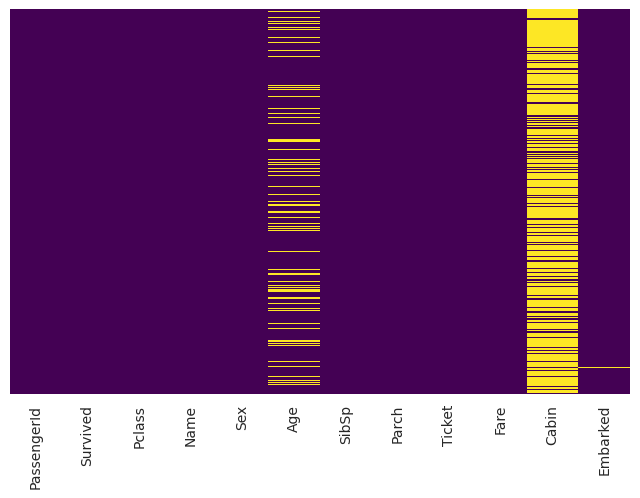

In [96]:
plt.figure(figsize=(8,5))
sns.heatmap(titanic_data_train.isna(), yticklabels=False,  cmap='viridis',cbar=False)


In [97]:
titanic_data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

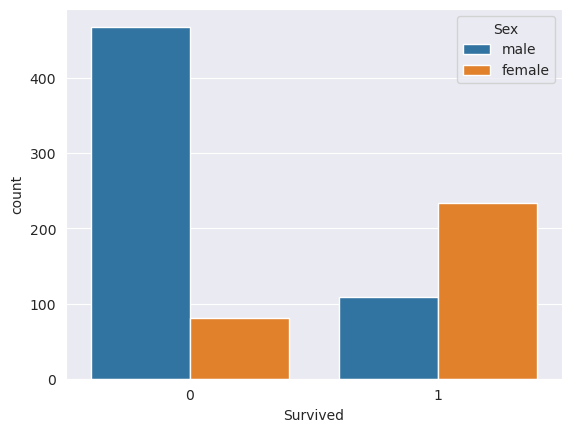

In [98]:
sns.set_style('darkgrid')
sns.countplot(data=titanic_data_train,x="Survived",hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

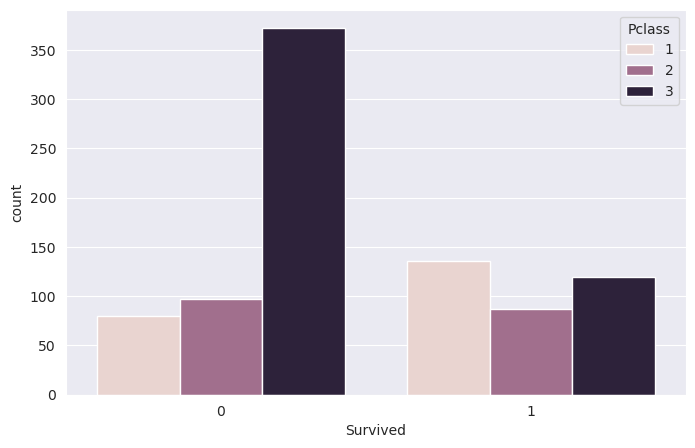

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(data=titanic_data_train,x="Survived",hue="Pclass")

<Figure size 1000x800 with 0 Axes>

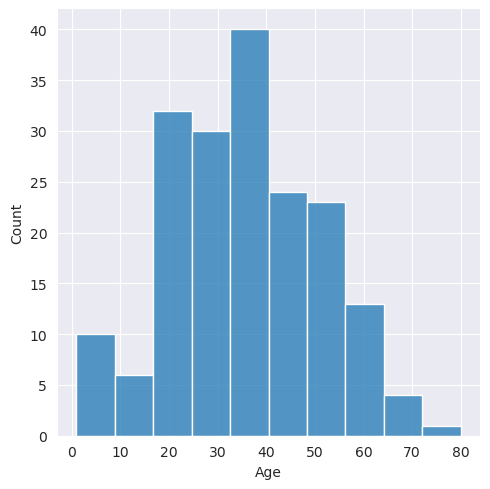

In [100]:
plt.figure(figsize=(10,8))
sns.displot(data=titanic_data_train.dropna(),x="Age")

<Axes: xlabel='Survived', ylabel='Age'>

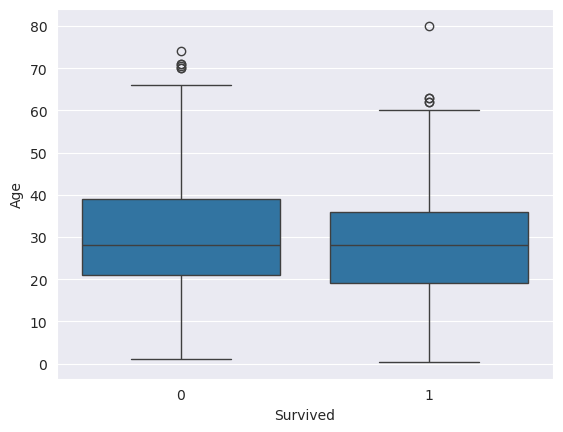

In [101]:
sns.boxplot(x='Survived', y='Age', data=titanic_data_train)

<Axes: xlabel='SibSp', ylabel='count'>

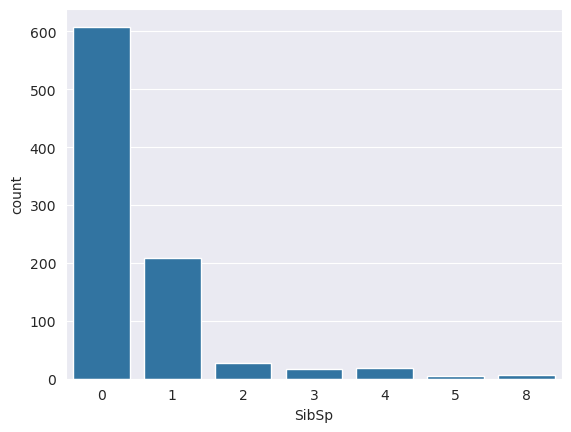

In [102]:
sns.countplot(data=titanic_data_train,x='SibSp')

32.204207968574636

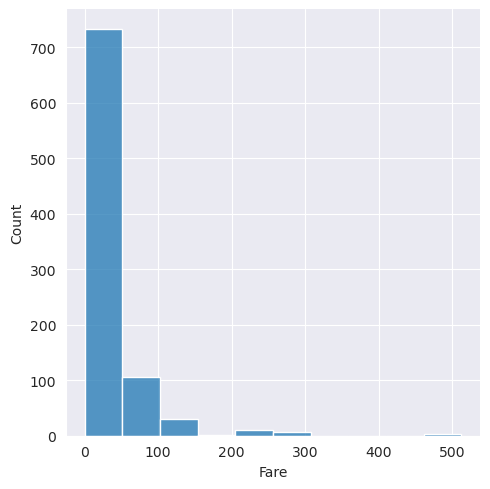

In [103]:
sns.displot(titanic_data_train['Fare'],bins=10)
titanic_data_train['Fare'].mean()

In [104]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

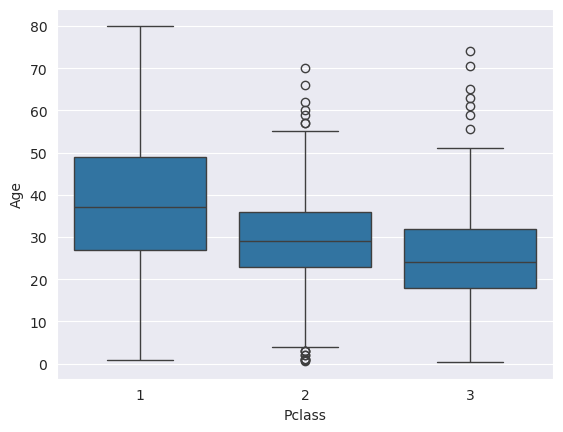

In [105]:
sns.boxplot(data=titanic_data_train,x="Pclass",y="Age")

## Feature Engineering

In [106]:
pclass_1_ave,p_class_2_avg, pclass_3_avg = titanic_data_train.groupby('Pclass')["Age"].mean()

def age_modifier(age,pclass):
    """this function is used to fill null values of age column with the help of pclass"""
    if np.isnan(age):
        if pclass ==1:
            return pclass_1_ave
        elif pclass == 2:
            return p_class_2_avg
        else:
            return pclass_3_avg
    else:
        return age
    
    

In [107]:
titanic_data_train["Age"]=titanic_data_train.apply(lambda x:age_modifier(x["Age"],x["Pclass"]) ,axis=1)


<Axes: >

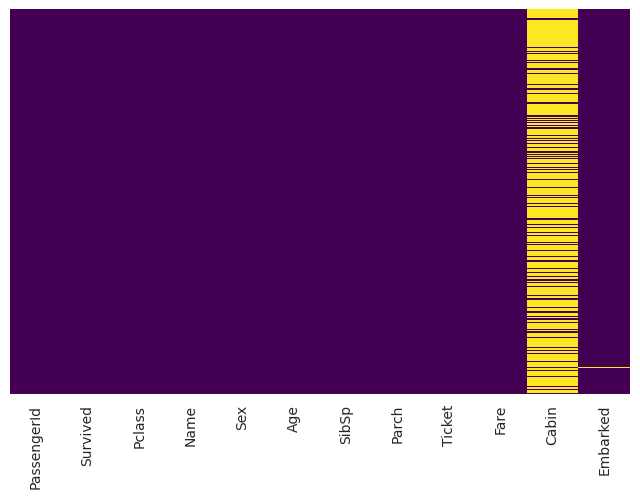

In [108]:
plt.figure(figsize=(8,5))
sns.heatmap(titanic_data_train.isna(), yticklabels=False,  cmap='viridis',cbar=False)

In [109]:
titanic_data_train.drop('Cabin',axis=1,inplace=True)


<Axes: >

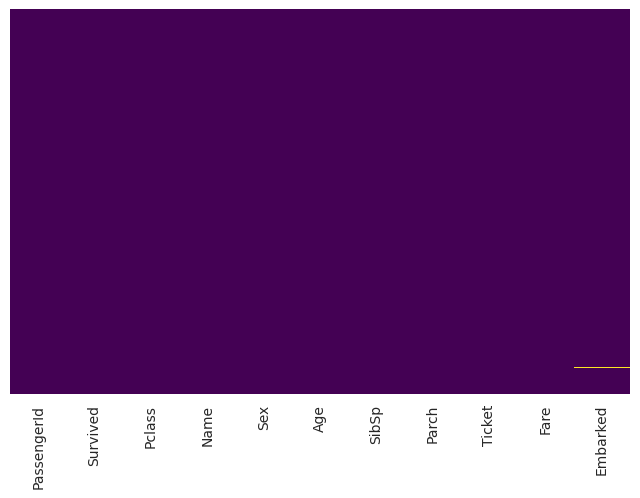

In [110]:
plt.figure(figsize=(8,5))
sns.heatmap(titanic_data_train.isna(), yticklabels=False,  cmap='viridis',cbar=False)


In [111]:
titanic_data_train[titanic_data_train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [112]:
titanic_data_train.dropna(inplace=True)

In [113]:
# for test data 
titanic_data_test["Age"]=titanic_data_test.apply(lambda x:age_modifier(x["Age"],x["Pclass"]) ,axis=1)
titanic_data_test.drop('Cabin',axis=1,inplace=True)
titanic_data_test.dropna(inplace=True)

In [114]:
titanic_data_train[titanic_data_train.isna().any(axis=1)]
titanic_data_test[titanic_data_test.isna().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [115]:
#  we have to convert the categorical data to numerical data
# method one
data=pd.get_dummies(titanic_data_train["Sex"],dtype=int,drop_first=True)
# this type of column are called multi-colinearity so drop one column
data



,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [116]:

# method two
from sklearn.preprocessing import LabelEncoder


# Convert categorical data to numerical data using LabelEncoder
le = LabelEncoder()
titanic_data_train["Sex"] =  le.fit_transform(titanic_data_train["Sex"])
titanic_data_train["Embarked"] =le.fit_transform(titanic_data_train["Embarked"])


# for test data 
titanic_data_test["Sex"] =  le.fit_transform(titanic_data_test["Sex"])
titanic_data_test["Embarked"] =le.fit_transform(titanic_data_test["Embarked"])

titanic_data_train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0


In [117]:
titanic_data_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2


In [118]:
titanic_data_train.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
titanic_data_test.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [119]:
titanic_data_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [120]:
titanic_data_test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


In [121]:
# def my_function_checker(input_one, input_two):
#     counts = {}
#     unique_input_one = set(input_one)  # Convert to a set to remove duplicates
#     for item in unique_input_one:
#         counts[item] = input_two.count(item)
#     return counts

# input_one = [1, 3, 4, 6, 1, 11]
# input_two = [1, 2, 1, 1, 1, 1, 3, 3]

# print(my_function_checker(input_one, input_two))



In [122]:
x_train = titanic_data_train.iloc[:, 1::]
y_train = titanic_data_train["Survived"]

In [129]:
# now train model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
lgt_model = LogisticRegression() 
lgt_model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred= lgt_model.predict(x_train)
confusion_matrix(y_train,y_pred)

In [136]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       549
           1       0.76      0.71      0.73       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.79       889
weighted avg       0.80      0.80      0.80       889

